## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.722887 -0.904513  0.063338 -0.168933 -0.196757 -0.597840
1 -1.132366 -1.005052 -0.093315 -1.575744 -0.509003 -2.227785
2 -0.045309  1.163059  1.219567 -1.228517  0.769356  0.603954
3 -0.378777 -1.328808  0.180686  1.734612  0.580135 -0.055992
4 -1.728801  0.599967 -0.342911  1.252930 -1.098130 -0.767699


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0305724	total: 68.7ms	remaining: 1m 8s
1:	learn: 1.0214437	total: 69.3ms	remaining: 34.6s
2:	learn: 1.0104272	total: 69.9ms	remaining: 23.2s
3:	learn: 0.9993875	total: 70.5ms	remaining: 17.6s
4:	learn: 0.9897422	total: 71ms	remaining: 14.1s
5:	learn: 0.9794629	total: 71.6ms	remaining: 11.9s
6:	learn: 0.9678351	total: 72.1ms	remaining: 10.2s
7:	learn: 0.9584323	total: 72.7ms	remaining: 9.02s
8:	learn: 0.9496113	total: 73.5ms	remaining: 8.09s
9:	learn: 0.9402689	total: 74ms	remaining: 7.33s
10:	learn: 0.9311257	total: 74.6ms	remaining: 6.71s
11:	learn: 0.9195987	total: 75.1ms	remaining: 6.18s
12:	learn: 0.9089686	total: 75.5ms	remaining: 5.74s
13:	learn: 0.8984844	total: 76ms	remaining: 5.35s
14:	learn: 0.8902411	total: 76.5ms	remaining: 5.02s
15:	learn: 0.8804929	total: 77.1ms	remaining: 4.74s
16:	learn: 0.8713240	total: 77.5ms	remaining: 4.48s
17:	learn: 0.8621533	total: 78.1ms	remaining: 4.26s
18:	learn: 0.8532908	total: 78.6ms	remaining: 4.06

78:	learn: 0.4867867	total: 108ms	remaining: 1.25s
79:	learn: 0.4828750	total: 108ms	remaining: 1.25s
80:	learn: 0.4785127	total: 109ms	remaining: 1.23s
81:	learn: 0.4736977	total: 109ms	remaining: 1.22s
82:	learn: 0.4686114	total: 110ms	remaining: 1.21s
83:	learn: 0.4641413	total: 110ms	remaining: 1.2s
84:	learn: 0.4596350	total: 110ms	remaining: 1.19s
85:	learn: 0.4558605	total: 111ms	remaining: 1.18s
86:	learn: 0.4516203	total: 111ms	remaining: 1.17s
87:	learn: 0.4475414	total: 112ms	remaining: 1.16s
88:	learn: 0.4433178	total: 112ms	remaining: 1.15s
89:	learn: 0.4395232	total: 112ms	remaining: 1.14s
90:	learn: 0.4360805	total: 113ms	remaining: 1.13s
91:	learn: 0.4319352	total: 113ms	remaining: 1.12s
92:	learn: 0.4284528	total: 114ms	remaining: 1.11s
93:	learn: 0.4241553	total: 114ms	remaining: 1.1s
94:	learn: 0.4207658	total: 114ms	remaining: 1.09s
95:	learn: 0.4177250	total: 115ms	remaining: 1.08s
96:	learn: 0.4142889	total: 115ms	remaining: 1.07s
97:	learn: 0.4108119	total: 116ms

243:	learn: 0.1476096	total: 187ms	remaining: 580ms
244:	learn: 0.1465019	total: 188ms	remaining: 579ms
245:	learn: 0.1454843	total: 188ms	remaining: 577ms
246:	learn: 0.1444530	total: 189ms	remaining: 575ms
247:	learn: 0.1435143	total: 189ms	remaining: 573ms
248:	learn: 0.1424656	total: 190ms	remaining: 572ms
249:	learn: 0.1412727	total: 190ms	remaining: 570ms
250:	learn: 0.1402613	total: 191ms	remaining: 569ms
251:	learn: 0.1391416	total: 191ms	remaining: 567ms
252:	learn: 0.1381913	total: 192ms	remaining: 566ms
253:	learn: 0.1372328	total: 192ms	remaining: 564ms
254:	learn: 0.1363904	total: 193ms	remaining: 563ms
255:	learn: 0.1353986	total: 193ms	remaining: 561ms
256:	learn: 0.1343419	total: 194ms	remaining: 560ms
257:	learn: 0.1332295	total: 194ms	remaining: 558ms
258:	learn: 0.1322355	total: 195ms	remaining: 556ms
259:	learn: 0.1312283	total: 195ms	remaining: 555ms
260:	learn: 0.1303963	total: 195ms	remaining: 553ms
261:	learn: 0.1296083	total: 196ms	remaining: 551ms
262:	learn: 

462:	learn: 0.0419281	total: 291ms	remaining: 338ms
463:	learn: 0.0417742	total: 292ms	remaining: 337ms
464:	learn: 0.0416222	total: 292ms	remaining: 336ms
465:	learn: 0.0414447	total: 292ms	remaining: 335ms
466:	learn: 0.0413009	total: 293ms	remaining: 334ms
467:	learn: 0.0411450	total: 293ms	remaining: 333ms
468:	learn: 0.0410087	total: 294ms	remaining: 333ms
469:	learn: 0.0408521	total: 294ms	remaining: 332ms
470:	learn: 0.0406740	total: 295ms	remaining: 331ms
471:	learn: 0.0403968	total: 295ms	remaining: 330ms
472:	learn: 0.0402526	total: 295ms	remaining: 329ms
473:	learn: 0.0399904	total: 296ms	remaining: 328ms
474:	learn: 0.0397705	total: 296ms	remaining: 327ms
475:	learn: 0.0395625	total: 297ms	remaining: 326ms
476:	learn: 0.0393048	total: 297ms	remaining: 326ms
477:	learn: 0.0390527	total: 297ms	remaining: 325ms
478:	learn: 0.0388102	total: 298ms	remaining: 324ms
479:	learn: 0.0387211	total: 298ms	remaining: 323ms
480:	learn: 0.0386332	total: 299ms	remaining: 323ms
481:	learn: 

637:	learn: 0.0219905	total: 371ms	remaining: 211ms
638:	learn: 0.0219131	total: 372ms	remaining: 210ms
639:	learn: 0.0218370	total: 372ms	remaining: 209ms
640:	learn: 0.0217532	total: 373ms	remaining: 209ms
641:	learn: 0.0216787	total: 373ms	remaining: 208ms
642:	learn: 0.0216004	total: 374ms	remaining: 207ms
643:	learn: 0.0214838	total: 374ms	remaining: 207ms
644:	learn: 0.0213700	total: 375ms	remaining: 206ms
645:	learn: 0.0212602	total: 375ms	remaining: 206ms
646:	learn: 0.0211787	total: 376ms	remaining: 205ms
647:	learn: 0.0211242	total: 376ms	remaining: 204ms
648:	learn: 0.0210705	total: 377ms	remaining: 204ms
649:	learn: 0.0209531	total: 377ms	remaining: 203ms
650:	learn: 0.0208463	total: 378ms	remaining: 203ms
651:	learn: 0.0207730	total: 378ms	remaining: 202ms
652:	learn: 0.0206653	total: 379ms	remaining: 201ms
653:	learn: 0.0205615	total: 379ms	remaining: 201ms
654:	learn: 0.0204540	total: 380ms	remaining: 200ms
655:	learn: 0.0203945	total: 380ms	remaining: 199ms
656:	learn: 

859:	learn: 0.0106179	total: 475ms	remaining: 77.3ms
860:	learn: 0.0105776	total: 476ms	remaining: 76.8ms
861:	learn: 0.0105094	total: 476ms	remaining: 76.2ms
862:	learn: 0.0104741	total: 477ms	remaining: 75.7ms
863:	learn: 0.0104295	total: 477ms	remaining: 75.1ms
864:	learn: 0.0103835	total: 478ms	remaining: 74.5ms
865:	learn: 0.0103462	total: 478ms	remaining: 74ms
866:	learn: 0.0103012	total: 479ms	remaining: 73.4ms
867:	learn: 0.0102571	total: 479ms	remaining: 72.8ms
868:	learn: 0.0102373	total: 479ms	remaining: 72.3ms
869:	learn: 0.0101941	total: 480ms	remaining: 71.7ms
870:	learn: 0.0101510	total: 480ms	remaining: 71.2ms
871:	learn: 0.0101181	total: 481ms	remaining: 70.6ms
872:	learn: 0.0100987	total: 481ms	remaining: 70ms
873:	learn: 0.0100664	total: 482ms	remaining: 69.5ms
874:	learn: 0.0100245	total: 482ms	remaining: 68.9ms
875:	learn: 0.0099928	total: 483ms	remaining: 68.4ms
876:	learn: 0.0099617	total: 484ms	remaining: 67.8ms
877:	learn: 0.0099427	total: 484ms	remaining: 67.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

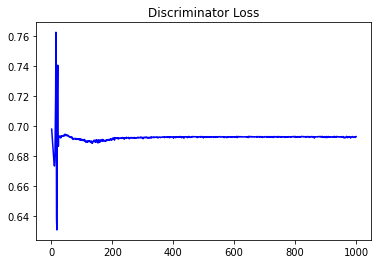

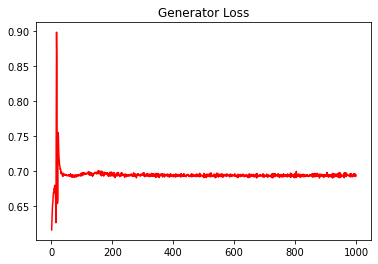

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.041507379124487175


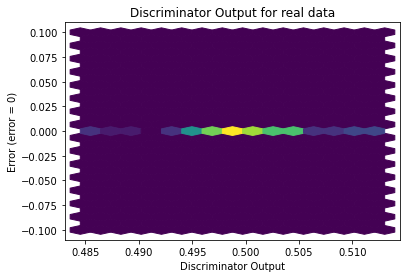

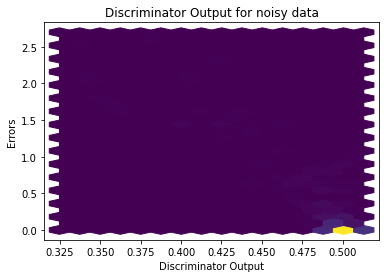

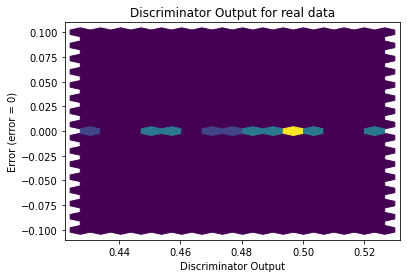

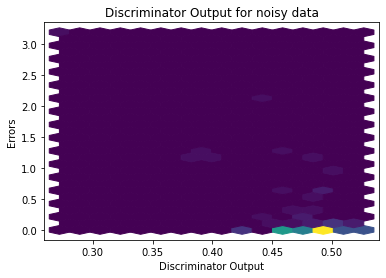

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


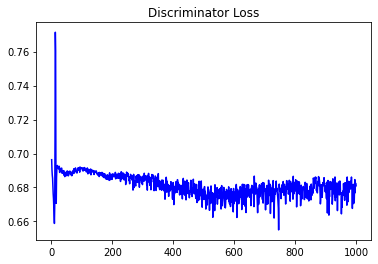

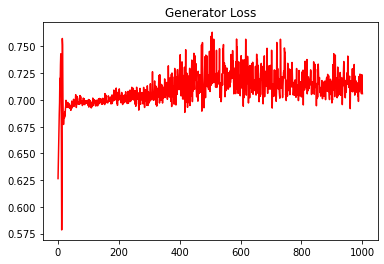

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.04100055049512205


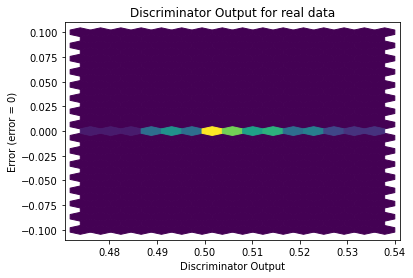

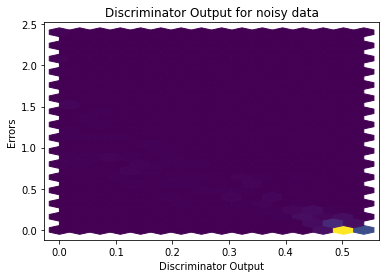

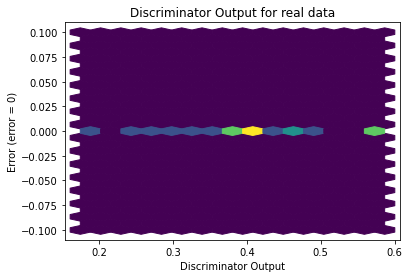

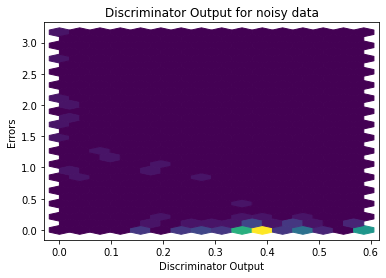

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1924]], requires_grad=True)
